In [2]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import pack_ga
import pack_cost
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt


local
stop final relax at some point


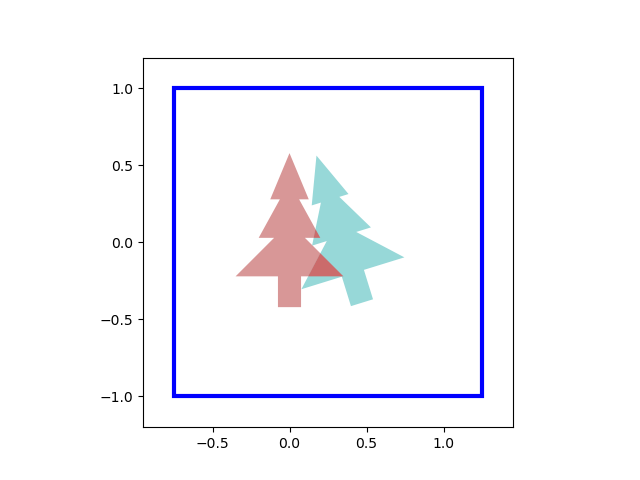

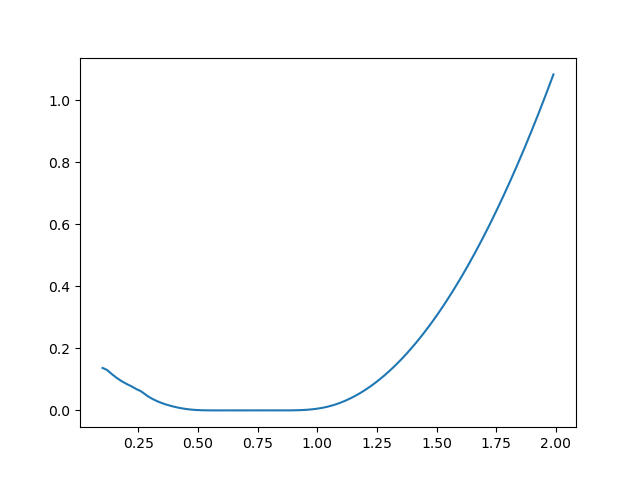

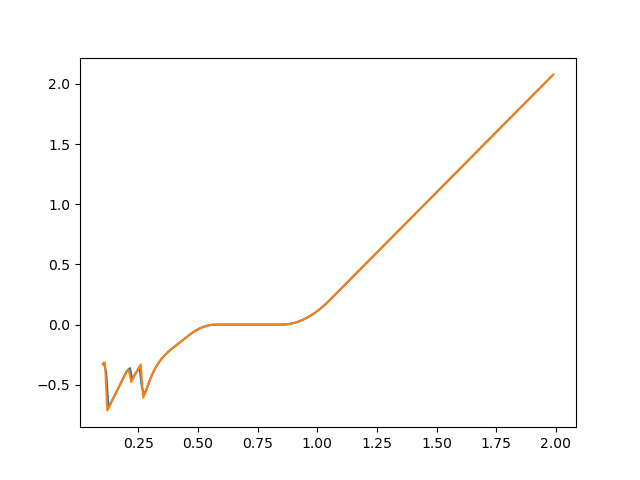

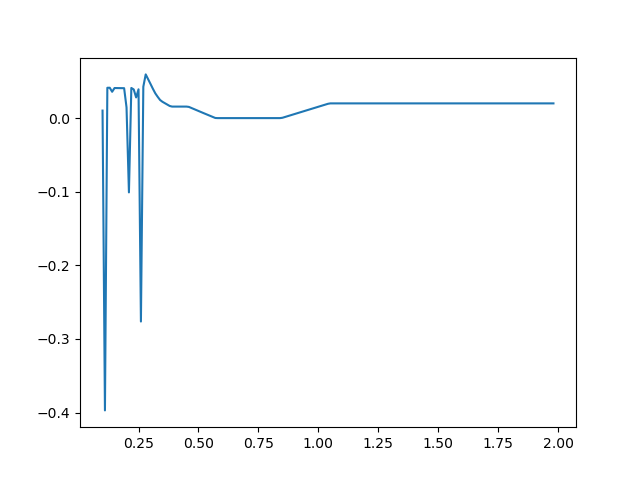

In [6]:
%matplotlib widget
importlib.reload(pack_cost)
sol = kgs.SolutionCollectionSquare()
sol.xyt = cp.array( [[[0.,0.,0.],[0.3464,0.01,0.3]]], dtype=kgs.dtype_cp)
sol.h = cp.array( [[2.,0.25,0.]] , dtype=kgs.dtype_cp)
sol.check_constraints()
cost = pack_ga.GA().fine_relaxers[0].cost
cost.costs.pop(0)
cost.costs[0].smoothing_h = 0.2
cost.costs[1].smoothing_h = 0.1
pack_vis_sol.pack_vis_sol(sol)
vals = []
grads = []
x_vals = np.arange(0.1,2.,0.01)
for x_val in x_vals:
    sol.xyt[0,1,0] = x_val
    this_cost, this_grad, _ = cost.compute_cost_ref(sol)
    vals.append(this_cost[0].get())
    grads.append(this_grad[0,1,0].get())
grads_alt = np.diff(vals) / np.diff(x_vals)
plt.figure()
plt.plot(x_vals, vals)
plt.figure()
plt.plot(x_vals[:-1]/2+x_vals[1:]/2, grads_alt)
plt.plot(x_vals, grads)
plt.figure()
plt.plot(x_vals[:-1], np.diff(grads))

In [ ]:
cost.costs

[BoundaryDistanceCost(comment='', scaling=1.0, use_kernel=True, smoothing_h=0.0),
 CollisionCostSeparation(comment='', scaling=1.0, use_max=False, TEMP_use_kernel=False)]